# ACM 116 Problem Set 1 - Eduardo Beltrame

Notebook repo: https://github.com/Munfred/acm116

You can run this notebook live by going to https://mybinder.org/v2/gh/Munfred/acm116/master

# Problem 1

![problem1](ps1_p1.jpg)

# Problem 2

Since the test came out positive, this must be either a false positive or a true positive.

The odds of a true positive are the probability that I have the disease $P(D) = 0.001$ times the probability of a true positive $P(TP) = P(P | D) = 0.99$ so $P(D) \cdot P(TP) = 0.00099$

The odds of a false positive are the probability that I am healthy $P(H) = 0.999$ times the probability of a false positive $P(FP) = P(P | H) = 0.02$ so $P(H) \cdot P(P | H) = 0.01998$

The odds of a test being  a true positive are $P(TP)/[P(TP) + P(FP)] = 0.00099/(0.00099 + 0.01998) = 0.0472$, so I'm not _that_ worried. 

# Problem 3a

We know that the expectation of a discrete random variable is given by: $ E(X) = \sum_i x_i \cdot p(x_i)$

We also know that the expectation is linear, so $E(n \cdot X) = n \cdot E(X)$.

For a single toss, we expect $p$ heads. So for $n$ tosses we expect $n \cdot p$ heads.

# Problem 3b

The average of all the 1000 realizations is  30.128  while the expected value is  30.0


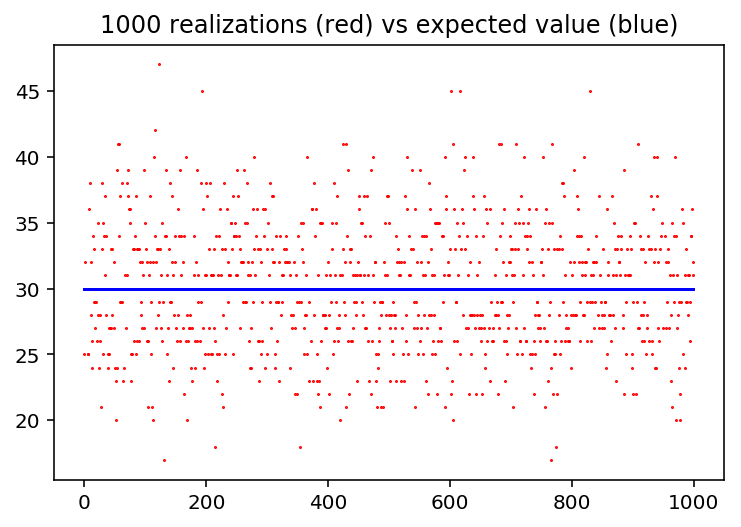

In [1]:
import numpy
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'retina'
numpy.random.seed = 2016
n=100
p=0.3
r=1000

realizations = numpy.random.binomial(n=n, p=p, size=r)
expected = np.array([n*p]*r)

print("The average of all the 1000 realizations is ", np.average(realizations), " while the expected value is ", n*p)

plt.plot(realizations,color='red', marker='.', linestyle=None,
        linewidth=0, markersize=1, label = 'Uqack' )
plt.plot(expected, color = 'blue')
plt.title('1000 realizations (red) vs expected value (blue)')
plt.show()

# Problem 4

In a die toss, each outcome has porbability $1/6$. 
So for $ A = {2,4,6}$, we have $P(A) = 3/6 = 1/2$.
Similarly for $B = {1,2,3,4}$ we have $P(B) = 4/6 = 2/3$. 
So $P(AB) = P (A) \cdot P(B) = 1/2 \cdot 2/3 = 1/3$, which is the probability that we see a 2 or a 4. 

In [2]:
numpy.random.seed = 123

N = 10000
# Do 10000 tosses
tosses = numpy.random.randint(low = 1, high=7, size=N)
# Counts the number of occurrences of each value
counts = numpy.bincount(tosses)
# P(A) = sums the occurrences of 2,4 or 6 and divides by N
PA = (counts[2] + counts[4] + counts[6])/N
# P(B) = sums the occurrences of 1,2,3 or 4 and divide by N 
PB =(counts[1] + counts[2] + counts[3] + counts[4])/N

# P(AB) sums the occurrences of 2 or 4 and divide by N
PAB = (counts[2] + counts[4])/N

print('P(A)=', PA)
print('P(B)=', PB)
print('P(AB)=', PAB)
print('P(A)*P(B)=', PA*PB)

P(A)= 0.5011
P(B)= 0.6626
P(AB)= 0.3323
P(A)*P(B)= 0.33202886


# Problem 5a

![problem1](ps1_p5a.jpg)

# Problem 5b

If the exponential distribution is given by $ \lambda e^{-\lambda x}$, then it's inverse is $- \frac{1}{\lambda}ln(\frac{e^{-\lambda x}}{\lambda})$

Using that, let's make the exponential random number generator:



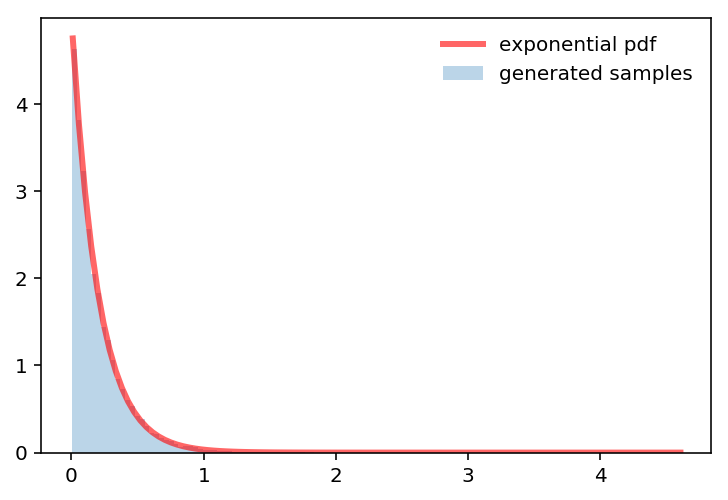

In [4]:
# We import scipy to use their exponential built in pdf for comparison
from scipy.stats import expon
numpy.random.seed = 116

N = 10000
lamb = 5

uniform_draws = numpy.random.uniform(low=0.0, high=1.0, size=N)
exponential_draws = -np.log(uniform_draws/lamb)/lamb - 0.32

# Plot a normalized distribution
fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
ax.plot(x, lamb*expon.pdf(lamb*x), 'r-', lw=3, alpha=0.6, label='exponential pdf')
ax.hist(exponential_draws,bins = 50, density=True, histtype='stepfilled', alpha=0.3,label='generated samples')

ax.legend(loc='best', frameon=False)
plt.show()

# Problem 6

Assuming that the location along the stick where it's broken is picked with uniform distribution, then for a stick of length $L$, if measuring the distance $d$ to the breaking point always from the same side, the expected value of $d$ is $L/2$. However, since we're always picking the largest of the two fragments, X can never be smaller than $L/2$, since if it were the other fragment would be larger than $L/2$ and we'd pick that instead. Thus our problem is equivalent to asking: when $d$ is greater than $L/2$, what is the expected size of $d$? 

Since the breaking point is picked with uniform probability, it follows that the expected size would be the midpoint between $L/2$ and $L$, which is $0.75 \cdot L$

# Problem 7
The first algorithm should be able to produce a 50/50 outcome of 0 or 1.
That is because we're treating two flips as the actual draw. If we have two different flips, the odds of getting heads then tails is the same as that of getting tails then heads. 

The second algorithm is biased towards the most common face. Let's say the coin flips heads 99% of the time and heads 1%. Then whenever we got a head, it will almost always be on the last draw, because we have a string of heads before that, and we will assign a head to it. 


# Problem 8

If there are $n$ different pokemons and I want at least $n$ unique pokemons, let's see how many boxes I need to open after finding each new pokemon type.

The first box is guaranteed to give be my first unique pokemon, so I opened $1$ box.

For the next box, the chances that I get a new pokemon type are $(n-1)/n$, so I expect to open $n/(n-1)$ boxes to find it.

Once I got two unique types, to get the third type the odds upon opening another box are $(n-2)/n$. So I expect to open $n/(n-2)$ boxes.

And so on. For the last type, the odds that I will get it are $1/n$, so I expect to open $n$ boxes.

If we sum the expected number of boxes for each new type we have: $ \sum_{i=1}^n \frac{n}{n-i +1}$ boxes